In [ ]:
root_directory = '/content/drive/MyDrive/Capstone Project/Machine Learning/Dataset/cat_and_dog_9_breeds'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# MODEL 1

## **TRAINING**

architecture : MobileNetV2<br>
image size : (224, 224, 3)

In [ ]:
import warnings
warnings.filterwarnings('ignore')
import os
import zipfile
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from tensorflow.keras.models import load_model
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
# Define the training and validation base directories
train_dir = root_directory + "/train"
validation_dir = root_directory + "/test"

# Directory with training sphynx pictures
train_sphynx_dir = os.path.join(train_dir, 'sphynx')
# Directory with training poodle pictures
train_poodle_dir = os.path.join(train_dir, 'poodle')
# Directory with training persian pictures
train_persian_dir = os.path.join(train_dir, 'persian')
# Directory with training golden retriever pictures
train_golden_retriever_dir = os.path.join(train_dir, 'golden_retriever')
# Directory with training chihuahua pictures
train_chihuahua_dir = os.path.join(train_dir, 'chihuahua')
# Directory with training british shorthair pictures
train_british_shorthair_dir = os.path.join(train_dir, 'british_shorthair')
# Directory with training bulldog pictures
train_bulldog_dir = os.path.join(train_dir, 'bulldog')
# Directory with training bengal pictures
train_bengal_dir = os.path.join(train_dir, 'bengal')
# Directory with training rottweiler pictures
train_rottweiler_dir = os.path.join(train_dir, 'rottweiler')

# Directory with training sphynx pictures
validation_sphynx_dir = os.path.join(validation_dir, 'sphynx')
# Directory with training poodle pictures
validation_poodle_dir = os.path.join(validation_dir, 'poodle')
# Directory with training persian pictures
validation_persian_dir = os.path.join(validation_dir, 'persian')
# Directory with training golden retriever pictures
validation_golden_retriever_dir = os.path.join(validation_dir, 'golden_retriever')
# Directory with training chihuahua pictures
validation_chihuahua_dir = os.path.join(validation_dir, 'chihuahua')
# Directory with training british shorthair pictures
validation_british_shorthair_dir = os.path.join(validation_dir, 'british_shorthair')
# Directory with training bulldog pictures
validation_bulldog_dir = os.path.join(validation_dir, 'bulldog')
# Directory with training bengal pictures
validation_bengal_dir = os.path.join(validation_dir, 'bengal')
# Directory with training rottweiler pictures
validation_rottweiler_dir = os.path.join(validation_dir, 'rottweiler')

# Check the number of images for each class and set
print(f"There are {len(os.listdir(train_sphynx_dir))} images of sphynx for training.\n")
print(f"There are {len(os.listdir(train_poodle_dir))} images of poodle for training.\n")
print(f"There are {len(os.listdir(train_persian_dir))} images of persian for training.\n")
print(f"There are {len(os.listdir(train_golden_retriever_dir))} images of golden retriever for training.\n")
print(f"There are {len(os.listdir(train_chihuahua_dir))} images of chihuahua for training.\n")
print(f"There are {len(os.listdir(train_british_shorthair_dir))} images of british shorthair for training.\n")
print(f"There are {len(os.listdir(train_bulldog_dir))} images of bulldog for training.\n")
print(f"There are {len(os.listdir(train_bengal_dir))} images of bengal for training.\n")
print(f"There are {len(os.listdir(train_rottweiler_dir))} images of rottweiler for training.\n")

There are 140 images of sphynx for training.

There are 140 images of poodle for training.

There are 140 images of persian for training.

There are 160 images of golden retriever for training.

There are 140 images of chihuahua for training.

There are 140 images of british shorthair for training.

There are 140 images of bulldog for training.

There are 140 images of bengal for training.

There are 140 images of rottweiler for training.



Sample sphynx image:


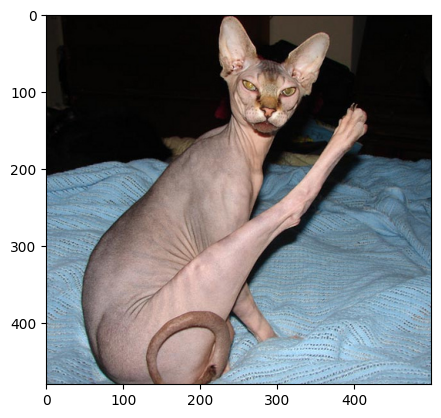


Sample golden retriever image:


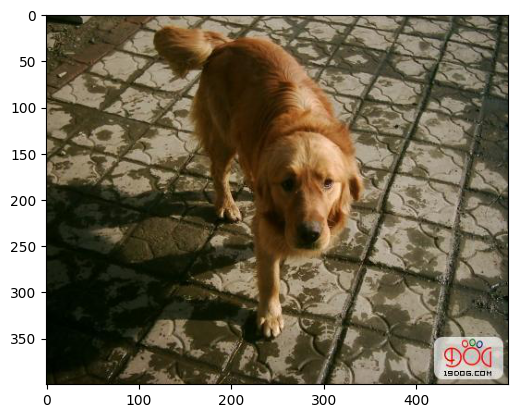


Sample poodle image:


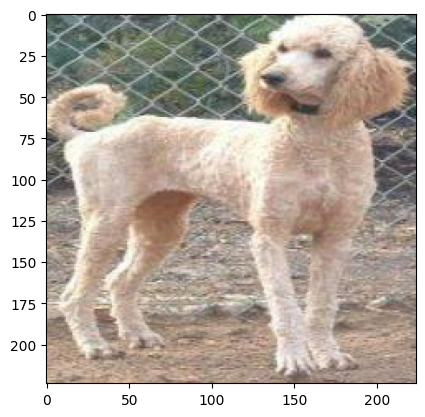

Sample british shorthair image:


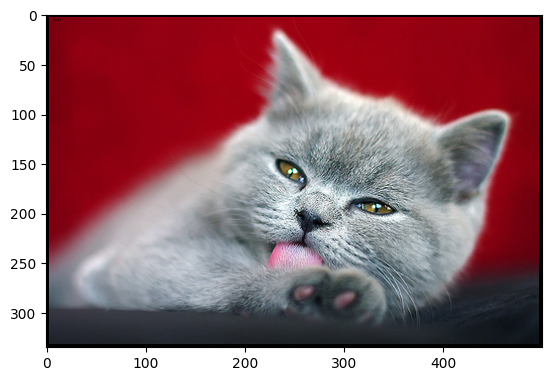


Sample bengal image:


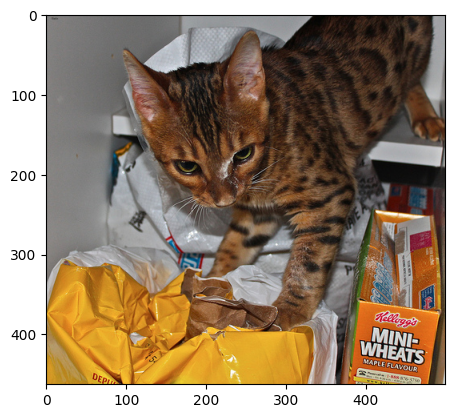


Sample persian image:


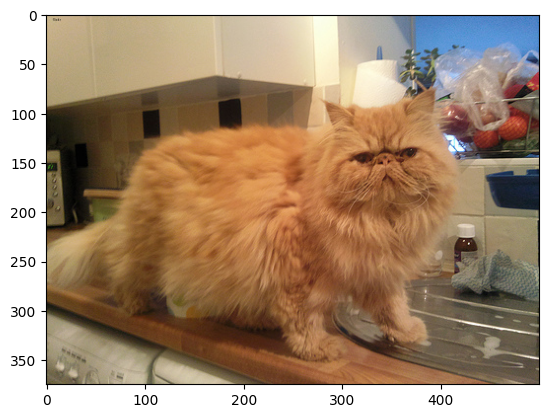

Sample chihuahua image:


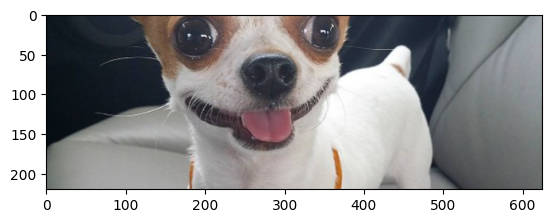


Sample rottweiler image:


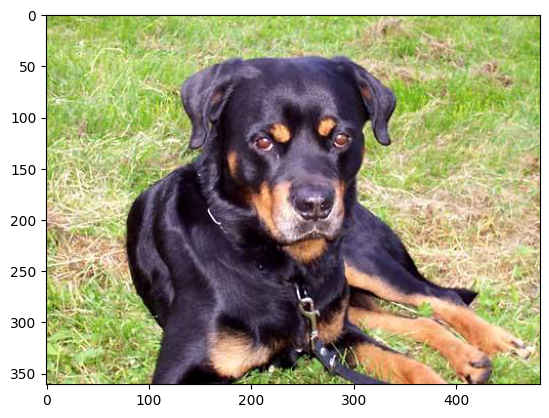


Sample bulldog image:


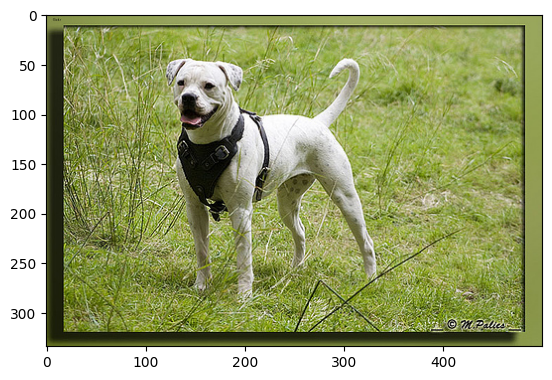

In [ ]:
print("Sample sphynx image:")
plt.imshow(load_img(f"{os.path.join(train_sphynx_dir, os.listdir(train_sphynx_dir)[0])}"))
plt.show()

print("\nSample golden retriever image:")
plt.imshow(load_img(f"{os.path.join(train_golden_retriever_dir, os.listdir(train_golden_retriever_dir)[0])}"))
plt.show()

print("\nSample poodle image:")
plt.imshow(load_img(f"{os.path.join(train_poodle_dir, os.listdir(train_poodle_dir)[0])}"))
plt.show()

print("Sample british shorthair image:")
plt.imshow(load_img(f"{os.path.join(train_british_shorthair_dir, os.listdir(train_british_shorthair_dir)[0])}"))
plt.show()

print("\nSample bengal image:")
plt.imshow(load_img(f"{os.path.join(train_bengal_dir, os.listdir(train_bengal_dir)[0])}"))
plt.show()

print("\nSample persian image:")
plt.imshow(load_img(f"{os.path.join(train_persian_dir, os.listdir(train_persian_dir)[0])}"))
plt.show()

print("Sample chihuahua image:")
plt.imshow(load_img(f"{os.path.join(train_chihuahua_dir, os.listdir(train_chihuahua_dir)[0])}"))
plt.show()

print("\nSample rottweiler image:")
plt.imshow(load_img(f"{os.path.join(train_rottweiler_dir, os.listdir(train_rottweiler_dir)[0])}"))
plt.show()

print("\nSample bulldog image:")
plt.imshow(load_img(f"{os.path.join(train_bulldog_dir, os.listdir(train_bulldog_dir)[0])}"))
plt.show()

In [ ]:
# Load the first example of a sphynx
sample_image  = load_img(f"{os.path.join(train_sphynx_dir, os.listdir(train_sphynx_dir)[0])}")

# Convert the image into its numpy array representation
sample_array = img_to_array(sample_image)

print(f"Each image has shape: {sample_array.shape}")

Each image has shape: (480, 500, 3)


### Image Augmentation and Labeling

In [ ]:
def train_val_generators(TRAINING_DIR, VALIDATION_DIR):
  ### START CODE HERE
  # Instantiate the ImageDataGenerator class (don't forget to set the arguments to augment the images)
  train_datagen = ImageDataGenerator(rescale=1.0/255,
                                     rotation_range=45,
                                     width_shift_range=0.25,
                                     height_shift_range=0.3,
                                     shear_range=0.2,
                                     zoom_range=0.2,
                                     horizontal_flip=True,
                                     fill_mode='nearest')

  # Pass in the appropriate arguments to the flow_from_directory method
  train_generator = train_datagen.flow_from_directory(directory=TRAINING_DIR,
                                                      batch_size=64,
                                                      class_mode='categorical',
                                                      target_size=(224,224),
                                                      shuffle=False)

  # Instantiate the ImageDataGenerator class (don't forget to set the rescale argument)
  validation_datagen =  ImageDataGenerator(rescale=1.0/255,
                                           rotation_range=45,
                                           width_shift_range=0.25,
                                           height_shift_range=0.3,
                                           shear_range=0.2,
                                           zoom_range=0.2,
                                           horizontal_flip=True,
                                           fill_mode='nearest')

  # Pass in the appropriate arguments to the flow_from_directory method
  validation_generator = validation_datagen.flow_from_directory(directory=VALIDATION_DIR,
                                                                batch_size=64,
                                                                class_mode='categorical',
                                                                target_size=(224,224),
                                                                shuffle=False)
  ### END CODE HERE
  return train_generator, validation_generator

In [ ]:
train_generator, validation_generator = train_val_generators(train_dir, validation_dir)

Found 1280 images belonging to 9 classes.
Found 540 images belonging to 9 classes.


### Transfer Learning

In [ ]:
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2

In [ ]:
pre_trained_model = MobileNetV2(input_shape = (224,224,3),
                              include_top = False, 
                              weights = 'imagenet') 
# Make all the layers in the pre-trained model non-trainable
for layer in pre_trained_model.layers:
  layer.trainable = False

In [ ]:
pre_trained_model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                              

In [ ]:
# Choose `block_16_project` as the last layer of your base model
last_layer = pre_trained_model .get_layer('block_16_project')
print('last layer output shape: ', last_layer.output_shape)
last_output = last_layer.output

last layer output shape:  (None, 7, 7, 320)


In [ ]:
# Flatten the output layer to 1 dimension
x = layers.Flatten()(last_output)
# Add a fully connected layer with 1024 hidden units and ReLU activation
x = layers.Dense(1024, activation='relu')(x)
# Add a fully connected layer with 256 hidden units and ReLU activation
x = layers.Dense(256, activation='relu')(x)
# Add a dropout rate of 0.2
x = layers.Dropout(0.2)(x)
# Add a final softmax layer for classification
x = layers.Dense(9, activation='softmax')(x)           

# Append the dense network to the base model
model = Model(pre_trained_model.input, x) 

# Print the model summary. See your dense network connected at the end.
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                                             

In [ ]:
total_params = model.count_params()
num_trainable_params = sum([w.shape.num_elements() for w in model.trainable_weights])

print(f"There are {total_params:,} total parameters in this model.")
print(f"There are {num_trainable_params:,} trainable parameters in this model.")

There are 18,164,041 total parameters in this model.
There are 16,322,057 trainable parameters in this model.


### Early Stop Callback

In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.95):
      print("\nReached 95.0% accuracy so cancelling training!")
      self.model.stop_training = True

### Iteration

In [ ]:
# Run this and see how many epochs it should take before the callback
# fires, and stops training at 95% accuracy
# (It should take a few epochs)

model.compile(optimizer = Adam(learning_rate = 0.001),
              loss = "categorical_crossentropy", 
              metrics = ['accuracy'])
callbacks = myCallback()
history = model.fit(train_generator,
                    validation_data = validation_generator,
                    epochs = 100,
                    verbose = 1,
                    steps_per_epoch = 20,
                    callbacks=[callbacks])

Epoch 1/100
20/20 [==============================] - 140s 7s/step - loss: 13.7563 - accuracy: 0.2609 - val_loss: 1.5343 - val_accuracy: 0.5759
Epoch 2/100
20/20 [==============================] - 128s 6s/step - loss: 1.0557 - accuracy: 0.6680 - val_loss: 0.5878 - val_accuracy: 0.8167
Epoch 3/100
20/20 [==============================] - 169s 9s/step - loss: 0.5668 - accuracy: 0.8242 - val_loss: 0.4445 - val_accuracy: 0.8593
Epoch 4/100
20/20 [==============================] - 129s 7s/step - loss: 0.4070 - accuracy: 0.8680 - val_loss: 0.4340 - val_accuracy: 0.8481
Epoch 5/100
20/20 [==============================] - 129s 7s/step - loss: 0.3972 - accuracy: 0.8711 - val_loss: 0.3117 - val_accuracy: 0.8944
Epoch 6/100
20/20 [==============================] - 128s 6s/step - loss: 0.3142 - accuracy: 0.8992 - val_loss: 0.3254 - val_accuracy: 0.8907
Epoch 7/100
20/20 [==============================] - 170s 9s/step - loss: 0.3525 - accuracy: 0.8883 - val_loss: 0.3330 - val_accuracy: 0.8833
Epoch

### Accuracy

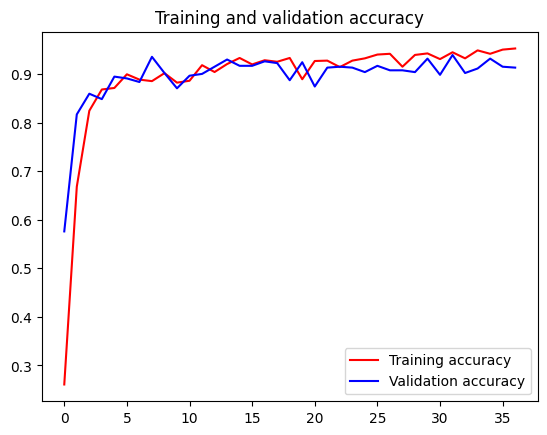

<Figure size 640x480 with 0 Axes>

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()

### Loss

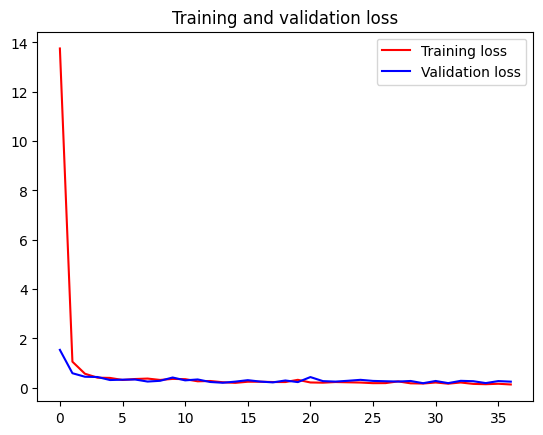

<Figure size 640x480 with 0 Axes>

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()

plt.show()

### Save Model as hdf5 file

In [ ]:
# from tensorflow.keras.models import load_model

model.save('/content/drive/MyDrive/Colab Notebooks/model2_mobilenetv2.hdf5')

## EVALUATION

In [ ]:
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes, normalize=True, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure(figsize=(10,10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = np.around(cm, decimals=2)
        cm[np.isnan(cm)] = 0.0
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

### Training Accuracy

20/20 [==============================] - 80s 4s/step
Classification Report
                   precision    recall  f1-score   support

           bengal       0.98      0.98      0.98       140
british_shorthair       0.99      0.91      0.95       140
          bulldog       0.99      0.93      0.96       140
        chihuahua       0.83      0.99      0.91       140
 golden_retriever       0.96      0.96      0.96       160
          persian       0.96      0.99      0.97       140
           poodle       0.97      1.00      0.99       140
       rottweiler       1.00      0.97      0.99       140
           sphynx       0.98      0.91      0.95       140

         accuracy                           0.96      1280
        macro avg       0.96      0.96      0.96      1280
     weighted avg       0.96      0.96      0.96      1280



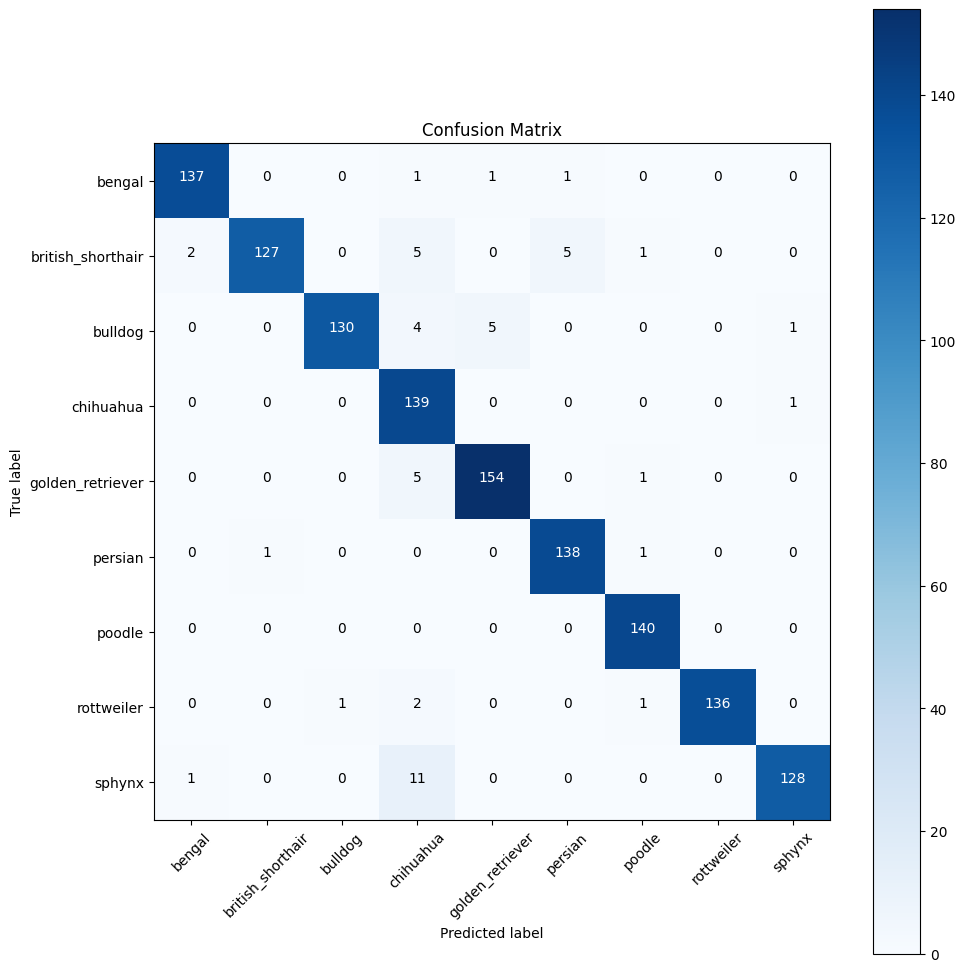

In [ ]:
# On training dataset
Y_pred = model.predict(train_generator)
y_pred = np.argmax(Y_pred, axis=1)
target_names = ['bengal', 'british_shorthair', 'bulldog', 'chihuahua', 'golden_retriever',
                'persian', 'poodle', 'rottweiler', 'sphynx']

# Confusion Matrix
cm = confusion_matrix(train_generator.classes, y_pred)
plot_confusion_matrix(cm, target_names, normalize=False, title='Confusion Matrix')

# Classification Report
print('Classification Report')
print(classification_report(train_generator.classes, y_pred, target_names=target_names))

### Validation Accuracy

9/9 [==============================] - 42s 5s/step
Classification Report
                   precision    recall  f1-score   support

           bengal       0.96      0.92      0.94        60
british_shorthair       0.95      0.87      0.90        60
          bulldog       0.98      0.77      0.86        60
        chihuahua       0.69      1.00      0.82        60
 golden_retriever       0.95      0.92      0.93        60
          persian       0.93      0.95      0.94        60
           poodle       0.91      1.00      0.95        60
       rottweiler       0.98      0.95      0.97        60
           sphynx       0.86      0.73      0.79        60

         accuracy                           0.90       540
        macro avg       0.91      0.90      0.90       540
     weighted avg       0.91      0.90      0.90       540



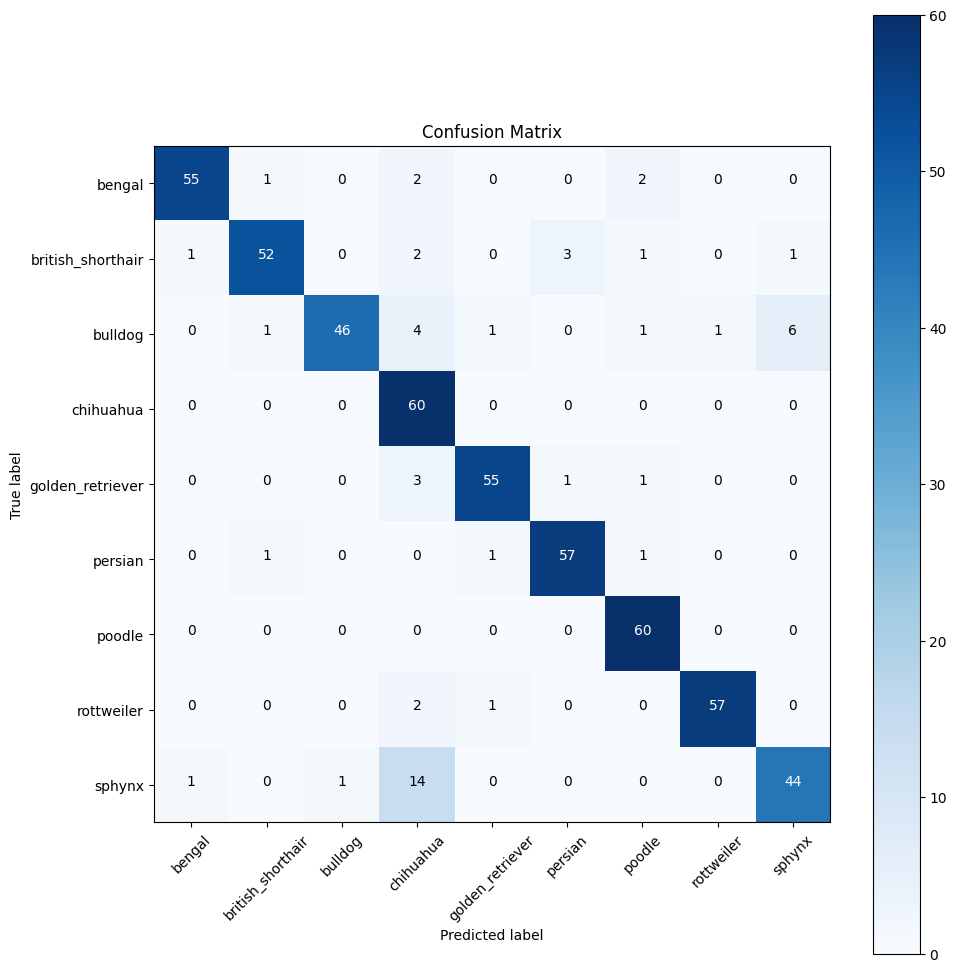

In [ ]:
# On test dataset
Y_pred = model.predict(validation_generator)
y_pred = np.argmax(Y_pred, axis=1)
target_names = ['bengal', 'british_shorthair', 'bulldog', 'chihuahua', 'golden_retriever',
                'persian', 'poodle', 'rottweiler', 'sphynx']

# Confusion Matrix
from sklearn.metrics import classification_report, confusion_matrix
cm = confusion_matrix(validation_generator.classes, y_pred)
plot_confusion_matrix(cm, target_names, normalize=False, title='Confusion Matrix')

# Classification Report
print('Classification Report')
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))